# Membuat Sistem Rekomendasi Buku

# Data Understanding

**Unzip Dataset**

Pada tahap ini kita akan melakukan unzip, terhadap dataset yang sudah kita upload

In [ ]:
!unzip /content/booksdataset.zip

Archive:  /content/booksdataset.zip
  inflating: booksdataset/Books.csv  
  inflating: booksdataset/Ratings.csv  
  inflating: booksdataset/Users.csv  


**Read Data dan lihat jumlah data**

Pada tahap ini lakukan read dataset dengan fungsi read_csv() dan menghitung jumlah data unik dengan fungsi len()

In [ ]:
import pandas as pd

books = pd.read_csv('/content/booksdataset/Books.csv')
user = pd.read_csv('/content/booksdataset/Users.csv')
rating = pd.read_csv('/content/booksdataset/Ratings.csv')
 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print('Jumlah data buku: ', len(books.ISBN.unique()))
print('Jumlah data user: ', len(user.UserID.unique()))
print('Jumlah data rating: ', len(rating.UserID.unique()))

Jumlah data buku:  271360
Jumlah data user:  278858
Jumlah data rating:  95513


# Univariate Exploratory Data Analysis

**Exploratory variabel books**


Melihat variabel book secara keseluruhan

In [ ]:
books

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Melihat variabel dan tipe data setiap variabel yang ada di dalam variabel books

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   BookTitle          271360 non-null  object
 2   BookAuthor         271359 non-null  object
 3   YearOfPublication  271360 non-null  object
 4   Publisher          271358 non-null  object
 5   ImageURLS          271360 non-null  object
 6   ImageURLM          271360 non-null  object
 7   ImageURLL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Menghitung jumlah buku yang unik dihitung lewat ISBN buku dan menampilkan nama-nama buku tersebut

In [ ]:
print('Banyak data: ', len(books.ISBN.unique()))
print('nama buku: ', books.BookTitle.unique())

Banyak data:  271360
nama buku:  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


**Exploratory variabel user**

Melihat data user secara keseluruhan

In [ ]:
user

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


mengetahui variabel apa saja yang ada di dalam variabel user dan tipe data variabel tersebut

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Exploratory Variabel Rating**

melihat 5 data teratas variabel rating

In [ ]:
rating.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


Tahap di bawah ini kita mengekspolarasi variabel rating dengan melihat variabel apa saja yang ada di dalam variabel rating beserta tipe datanya

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1048575 non-null  int64 
 1   ISBN        1048575 non-null  object
 2   BookRating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Menghitung jumlah data rating berdasarkan userID dan melihat rating berapa saja yang sudah diberikan pembaca kepada sebuah buku

In [ ]:
print('Banyak User: ', len(rating.UserID.unique()))
print('Data Rating : ', rating.BookRating.unique())

Banyak User:  95513
Data Rating :  [ 0  5  3  6  8  7 10  9  4  1  2]


# Data Preprocessing

**Menggabungkan dataframe rating dengan books berdasarkan ISBN**

Pada tahap ini kita akan menggabungkan 2 variabel yaitu rating dan books menjadi sebuah dataframe baru yaitu books berdasarkan ISBN menggunakan fungsi merge()



In [ ]:
books = pd.merge(rating, books , on='ISBN', how='left')
books

,UserID,ISBN,BookRating,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1048570,250764,451410777,0,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...
1048571,250764,452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
1048572,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
1048573,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


# Data Preparation


**Mengecek missing value**

Menggunakan fungsi isnull() untuk mengecek null value pada dataframe yang sudah digabung tadi kemudian menjumlahkannya dengan fungsi sum()

In [ ]:
books.isnull().sum()

UserID                    0
ISBN                      0
BookRating                0
BookTitle            107463
BookAuthor           107464
YearOfPublication    107463
Publisher            107465
ImageURLS            107463
ImageURLM            107463
ImageURLL            107467
dtype: int64

**Mengatasi missing value**

Setelah di cek 7, variabel terdeteksi null valueBookTitle, BookAuthor, YearOfPublication, Publisher, ImageURLS, ImageURLM, ImageURLL  sebanyak 107467.  

Lakukan pembersihan missing value dengan fungsi drop.na()

In [ ]:
books_clean = books.dropna()
books_clean

,UserID,ISBN,BookRating,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1048570,250764,451410777,0,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...
1048571,250764,452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
1048572,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
1048573,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


Mengecek berapa jumlah buku dengan fungsi len()

In [ ]:
len(books_clean.ISBN.unique())

257808

Melihat data judul buku yang unik

In [ ]:
books_clean.BookTitle.unique()

array(['Flesh Tones: A Novel', 'Rites of Passage', 'The Notebook', ...,
       'Glamorous Movie Stars of the Thirties: Paper Dolls',
       'Schiaparelli Fashion Review: Paper Dolls in Full Color',
       'Lady Laughing Eyes (To Have and to Hold)'], dtype=object)

**Menghitung dan Melihat Berapa kali buku di rating oleh pembaca**

Pada tahap ini kita akan menghitung berapa kali sebuah buku dirating oleh pembaca dengan fungsi count() dan mengelompolannya berdasarkan judul buku dengan fungsi groupby()

In [ ]:
jml_rating=books_clean.groupby('BookTitle').count()['BookRating'].reset_index()
jml_rating.rename(columns={'BookRating':'jumlah_rating'},inplace=True)
jml_rating

,BookTitle,jumlah_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230210,Ã?Â?l- Connection.,1
230211,Ã?Â?lpiraten.,2
230212,Ã?Â?rger mit Produkt X. Roman.,4
230213,Ã?Â?stlich der Berge.,2


**Menghitung dan Melihat Berapa kali buku di rating oleh pembaca**

Pada tahap ini kita akan menghitung rata-rata rating dengan fungsi mean() dan mengelompokannya berdasarkan judul buku dengan fungsi gropby()

In [ ]:
rt_rating=books_clean.groupby('BookTitle').mean()['BookRating'].reset_index()
rt_rating

,BookTitle,BookRating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230210,Ã?Â?l- Connection.,0.00
230211,Ã?Â?lpiraten.,0.00
230212,Ã?Â?rger mit Produkt X. Roman.,5.25
230213,Ã?Â?stlich der Berge.,4.00


**Menggabungkan dataframe jml_rating dengan dataframe rt_rating **

Menggabungkan kedua variabel di atas yaitu jml_rating dengan rt_rating berdasarkan book title, yang ditambung dalam dataframe baru yaitu popular_books

In [ ]:
popular_books= jml_rating.merge(rt_rating,on = 'BookTitle')
popular_books

,BookTitle,jumlah_rating,BookRating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
...,...,...,...
230210,Ã?Â?l- Connection.,1,0.00
230211,Ã?Â?lpiraten.,2,0.00
230212,Ã?Â?rger mit Produkt X. Roman.,4,5.25
230213,Ã?Â?stlich der Berge.,2,4.00


**Mengambil data buku yang populer sebanyak 50**

Tahap di bawah ini kita mengambil jumlah rating yang bernilai >= 500 kemudian kita urutkan berdasarkan rating bukunya.

In [ ]:
popular_books=popular_books[popular_books['jumlah_rating']>=500].sort_values('BookRating',ascending=False).head(50)

**Merge popular_books dengan dataframe books**

Gabungkan kembali data popular books diatas dengan dataset books awal kemudian drop booktitle yang duplikat

In [ ]:
popular_books=popular_books.merge(books,on='BookTitle').drop_duplicates('BookTitle')

Melihat data popular_books secara keseluruhan

In [ ]:
popular_books

,BookTitle,jumlah_rating,BookRating_x,UserID,ISBN,BookRating_y,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645,276929,439064864,0,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...
501,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343,276939,059035342X,0,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
1020,The Da Vinci Code,828,4.679952,276925,385504209,8,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1848,The Secret Life of Bees,704,4.558239,277427,142001740,0,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
2552,The Lovely Bones: A Novel,1164,4.457045,276925,316666343,0,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
3716,The Red Tent (Bestselling Backlist),668,4.326347,277378,312195516,7,Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4384,Where the Heart Is (Oprah's Book Club (Paperba...,527,4.070209,277901,446672211,7,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4911,Life of Pi,597,4.015075,277363,156027321,8,Yann Martel,2003,Harvest Books,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...
5508,Timeline,512,3.857422,277965,345417623,0,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...
6020,Angels &amp; Demons,616,3.788961,277157,743486226,7,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...


**Mengkonversi data series menjadi list**

Pada tahap ini kita akan mengkonversikan 3 data series yaitu ISBN, BookTitle dan BookAuthor menjadi list

In [ ]:
book_id = popular_books['ISBN'].tolist()
 
book_title = popular_books['BookTitle'].tolist()

book_author = popular_books['BookAuthor'].tolist()
 
print(len(book_id))
print(len(book_title))
print(len(book_author))

28
28
28


**Membuat dictionary untuk menentukan pasangan key-value pada data**

Membuat dictionary untuk ketiga data series yang sudah diubah menjadi list dan menenukan pasangan key-value

In [ ]:
book_new = pd.DataFrame({
    'id': book_id,
    'book_name': book_title,
    'author': book_author
})
book_new

,id,book_name,author
0,439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
1,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling
2,385504209,The Da Vinci Code,Dan Brown
3,142001740,The Secret Life of Bees,Sue Monk Kidd
4,316666343,The Lovely Bones: A Novel,Alice Sebold
5,312195516,The Red Tent (Bestselling Backlist),Anita Diamant
6,446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts
7,156027321,Life of Pi,Yann Martel
8,345417623,Timeline,MICHAEL CRICHTON
9,743486226,Angels &amp; Demons,Dan Brown


# Model Development dengan Content Based Filtering

**TF-IDF Vectorizer**

Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan penulis buku. Langkah-langkah yang dilakukan adalah
- Inisialisasi TfidfVectorizer
- Melakukan perhitungan idf pada data author
- Mapping array dari fitur index integer ke fitur nama

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 

tf = TfidfVectorizer()
 
tf.fit(book_new['author']) 
 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['alice',
 'amy',
 'andre',
 'anita',
 'bank',
 'billie',
 'blume',
 'brown',
 'crichton',
 'dan',
 'david',
 'diamant',
 'dubus',
 'emma',
 'fielding',
 'grisham',
 'guterson',
 'helen',
 'iii',
 'john',
 'judy',
 'kidd',
 'letts',
 'martel',
 'mclaughlin',
 'melissa',
 'michael',
 'monk',
 'nicholas',
 'rebecca',
 'rich',
 'rowling',
 'sebold',
 'shapero',
 'shreve',
 'sparks',
 'sue',
 'tan',
 'wells',
 'yann']

**Melakukan fit dan transformasi ke dalam bentuk matriks**

Pada tahap ini kita Melakukan fit lalu ditransformasikan ke bentuk matrix, kemudian kita akan mengecek ukuran matrix tfidf

In [ ]:
tfidf_matrix = tf.fit_transform(book_new['author']) 
 
tfidf_matrix.shape 

(28, 40)

**Menghasilkan vektor tf-idf dalam bentuk matriks**

Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

**Melihat matriks tf-idf untuk beberapa judul buku dan nama author**

Melihat persebaran matriks tf-idf untuk beberapa judul buku dan nama author pada sebuah tabel

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book_new.book_name
).sample(22, axis=1).sample(10, axis=0)

,shapero,michael,anita,diamant,martel,melissa,amy,iii,rebecca,judy,...,shreve,sue,mclaughlin,crichton,monk,letts,fielding,john,yann,bank
book_name,,,,,,,,,,,,,,,,,,,,,
The Nanny Diaries: A Novel,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.707107,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
Where the Heart Is (Oprah's Book Club (Paperback)),0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.707107,0.000000,0.000000,0.0,0.0
Angels &amp; Demons,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
Bridget Jones's Diary,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.0
Timeline,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.000000,0.000000,0.0,0.0
The Pilot's Wife : A Novel,0.0,0.000000,0.664679,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.747129,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
The Joy Luck Club,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.707107,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
A Painted House,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.707107,0.0,0.0
The Red Tent (Bestselling Backlist),0.0,0.000000,0.664679,0.747129,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


**Menghitung derajat kesamaan**

Pada tahap ini kita akan menghitung cosine similarity pada matrix tf-idf

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Melihat matriks kesamaan setiap buku**

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku, kemudain mengecek similarity matrix pada setiap buku

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['book_name'], columns=book_new['book_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (28, 28)


book_name,Summer Sisters,The Pilot's Wife : A Novel,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,The Girls' Guide to Hunting and Fishing
book_name,,,,,
The Brethren,0.0,0.000000,0.0,0.0,0.0
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),0.0,0.000000,0.0,0.0,0.0
The Da Vinci Code,0.0,0.000000,0.0,0.0,0.0
Bridget Jones's Diary,0.0,0.000000,1.0,0.0,0.0
A Painted House,0.0,0.000000,0.0,0.0,0.0
House of Sand and Fog,0.0,0.000000,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.000000,0.0,1.0,0.0
Life of Pi,0.0,0.000000,0.0,0.0,0.0
Snow Falling on Cedars,0.0,0.000000,0.0,0.0,0.0


**Mendapatkan Rekomendasi**

In [ ]:
def book_recommendations(book_name, similarity_data=cosine_sim_df, items=book_new[['book_name', 'author']], k=5):
     

    index = similarity_data.loc[:,book_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(book_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
book_new[book_new.book_name.eq('The Firm')]

,id,book_name,author
21,044021145X,The Firm,John Grisham


In [ ]:
book_recommendations('The Firm')

,book_name,author
0,The Summons,John Grisham
1,The Testament,John Grisham
2,A Painted House,JOHN GRISHAM
3,Life of Pi,Yann Martel
4,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts


# Model Development dengan Collaborative Filtering

## Data Understanding

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

**Membaca dataset**

In [ ]:
df = rating
df

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


## Data Preparation

**menyandikan (encode) fitur ‘user’ dan ‘ISBN’ ke dalam indeks integer**

Pada tahap ini kit mengubah userID menjadi list tanpa nilai yang sama, kemudian melakukan encoding userID dan melakukan proses encoding angka ke ke userID


In [ ]:
user_ids = df['UserID'].unique().tolist()
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Pada tahap ini kita mengubah ISBN menjadi list tanpa nilai yang sama, kemudian melakukan encoding ISBN dan melakukan proses encoding angka ke ISBN

In [ ]:
isbn = df['ISBN'].unique().tolist()
 
book_to_book_encoded = {x: i for i, x in enumerate(isbn)}
 
book_encoded_to_book = {i: x for i, x in enumerate(isbn)}

**Memetakan userID dan placeID ke dataframe yang berkaitan**

Lakukan mapping userID ke dataframe user dan mapping ISBN ke dataframe book

In [ ]:
df['user'] = df['UserID'].map(user_to_user_encoded)
 
df['book'] = df['ISBN'].map(book_to_book_encoded)

**Mengecek jumlah data dan mengubah nilai rating**

Mengecek jumlah data seperti jumlah user, jumlah buku, kemudian mengubah nilai rating menjadi float. Dapatkan hasil maximum dan minimum rating

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_book = len(book_encoded_to_book)
print(num_book)
 
df['rating'] = df['BookRating'].values.astype(np.float32)
 
min_rating = min(df['rating'])
 
max_rating = max(df['rating'])
 
print('Jumlah User : {}, Jumlah Buku: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

95513
322473
Jumlah User : 95513, Jumlah Buku: 322473, Min Rating: 0.0, Max Rating: 10.0


## Membagi Data untuk Training dan Validasi

**Mengacak dataset**

Pada tahap ini kita akan mengacak dataset, dengan menset random_state=42

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,UserID,ISBN,BookRating,user,book,rating
781974,189334,874776945,0,72121,19214,0.0
937737,227447,345435249,0,86519,10995,0.0
907828,220586,888947216,9,83903,108526,9.0
784628,189835,553234994,5,72327,269978,5.0
662460,160735,61098760,0,61455,28032,0.0
...,...,...,...,...,...,...
259178,60146,60964049,8,23699,527,8.0
365838,87746,090636213X,0,34096,162779,0.0
131932,30509,1857230655,0,12254,79523,0.0
671155,163307,446314145,0,62388,242617,0.0


**Membagi dataset**

Membuat variabel x untuk mencocokkan data user dan buku menjadi satu value, kemudian membuat variabel y untuk membuat rating dari hasil lalu membagi menjadi 80% data train dan 20% data validasi

In [ ]:
x = df[['user', 'book']].values
 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 72121  19214]
 [ 86519  10995]
 [ 83903 108526]
 ...
 [ 12254  79523]
 [ 62388 242617]
 [ 11319   1365]] [0.  0.  0.9 ... 0.  0.  0. ]


## Proses Training

In [ ]:
class RecommenderNet(tf.keras.Model):
 

  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    book_vector = self.book_embedding(inputs[:, 1]) 
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

**Model compile**

Lakukan compile pada model yang sudah didefinisikan dan gunakan metrik RMSE

In [ ]:
model = RecommenderNet(num_users, num_book, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

**Memulai training**

Lakukan training model dengan epoch 10 dan batch_size 128 

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
6554/6554 [==============================] - 1069s 163ms/step - loss: 0.5794 - root_mean_squared_error: 0.3724 - val_loss: 0.5562 - val_root_mean_squared_error: 0.3557
Epoch 2/10
6554/6554 [==============================] - 911s 139ms/step - loss: 0.5547 - root_mean_squared_error: 0.3531 - val_loss: 0.5627 - val_root_mean_squared_error: 0.3550
Epoch 3/10
6554/6554 [==============================] - 798s 122ms/step - loss: 0.5727 - root_mean_squared_error: 0.3580 - val_loss: 0.5735 - val_root_mean_squared_error: 0.3574
Epoch 4/10
6554/6554 [==============================] - 910s 139ms/step - loss: 0.6020 - root_mean_squared_error: 0.3671 - val_loss: 0.5795 - val_root_mean_squared_error: 0.3564
Epoch 5/10
6554/6554 [==============================] - 833s 127ms/step - loss: 0.6341 - root_mean_squared_error: 0.3765 - val_loss: 0.5927 - val_root_mean_squared_error: 0.3591
Epoch 6/10
6554/6554 [==============================] - 825s 126ms/step - loss: 0.6588 - root_mean_squared_er

## Visualisasi Metrik

Lakukan plot metrik

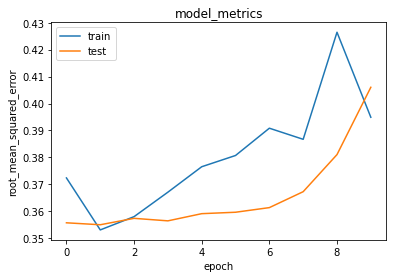

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi Buku

Mengambil sampel user secara acak dan definisikan variabel book_not_read yang merupakan daftar buku yang belum pernah dibaca

In [ ]:
book_df = book_new
df = pd.read_csv('/content/booksdataset/Ratings.csv')
 
user_id = df.UserID.sample(1).iloc[0]
book_read_by_user = df[df.UserID == user_id]
 
book_not_read = book_df[~book_df['id'].isin(book_read_by_user.ISBN.values)]['id'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Tahap di bawah ini akan menampilkan rekomendasi untuk pembaca

In [ ]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('books with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'BookRating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_name, ':', row.author)
 
print('----' * 8)
print('Top 10 books recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_name, ':', row.author)

Showing recommendations for users: 224349
books with high ratings from user
--------------------------------
--------------------------------
Top 10 books recommendation
--------------------------------
Harry Potter and the Chamber of Secrets (Book 2) : J. K. Rowling
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : J. K. Rowling
Where the Heart Is (Oprah's Book Club (Paperback)) : Billie Letts
Life of Pi : Yann Martel
The Notebook : Nicholas Sparks
Bridget Jones's Diary : Helen Fielding
The Pilot's Wife : A Novel : Anita Shreve
The Summons : John Grisham
Summer Sisters : Judy Blume
The Firm : John Grisham
